In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns


In [41]:
avocado_df=pd.read_csv(r"C:\Users\Sangeeta\Downloads\P74-Project-4\Project 4\avocado.csv")

In [3]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
from prophet import Prophet

In [6]:
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
avocado_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18244    False
18245    False
18246    False
18247    False
18248    False
Length: 18249, dtype: bool

In [12]:
avocado_df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [15]:
avocado_df.sort_values('Date').reset_index()

,index,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
1,9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2,10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
3,1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
4,9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
18245,9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18246,18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
18247,17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


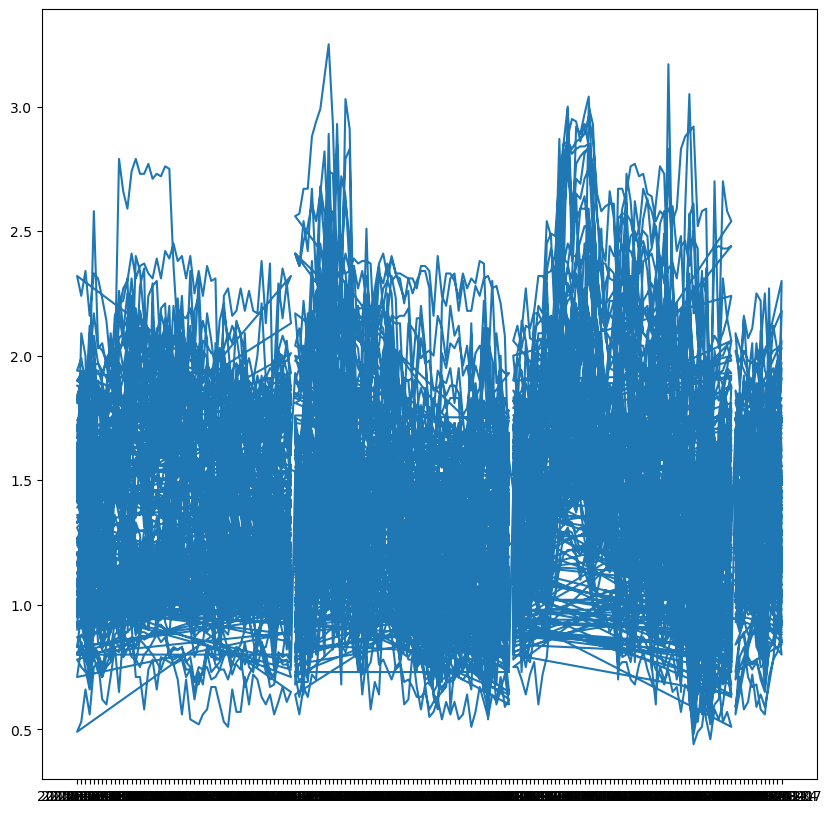

In [20]:
#since it is not readable in a simple plot format
plt.figure(figsize=(10,10))
plt.plot(avocado_df['Date'],avocado_df['AveragePrice'])

In [18]:
avocado_df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [24]:
region_count=avocado_df.groupby('region').size().reset_index(name='count')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'L

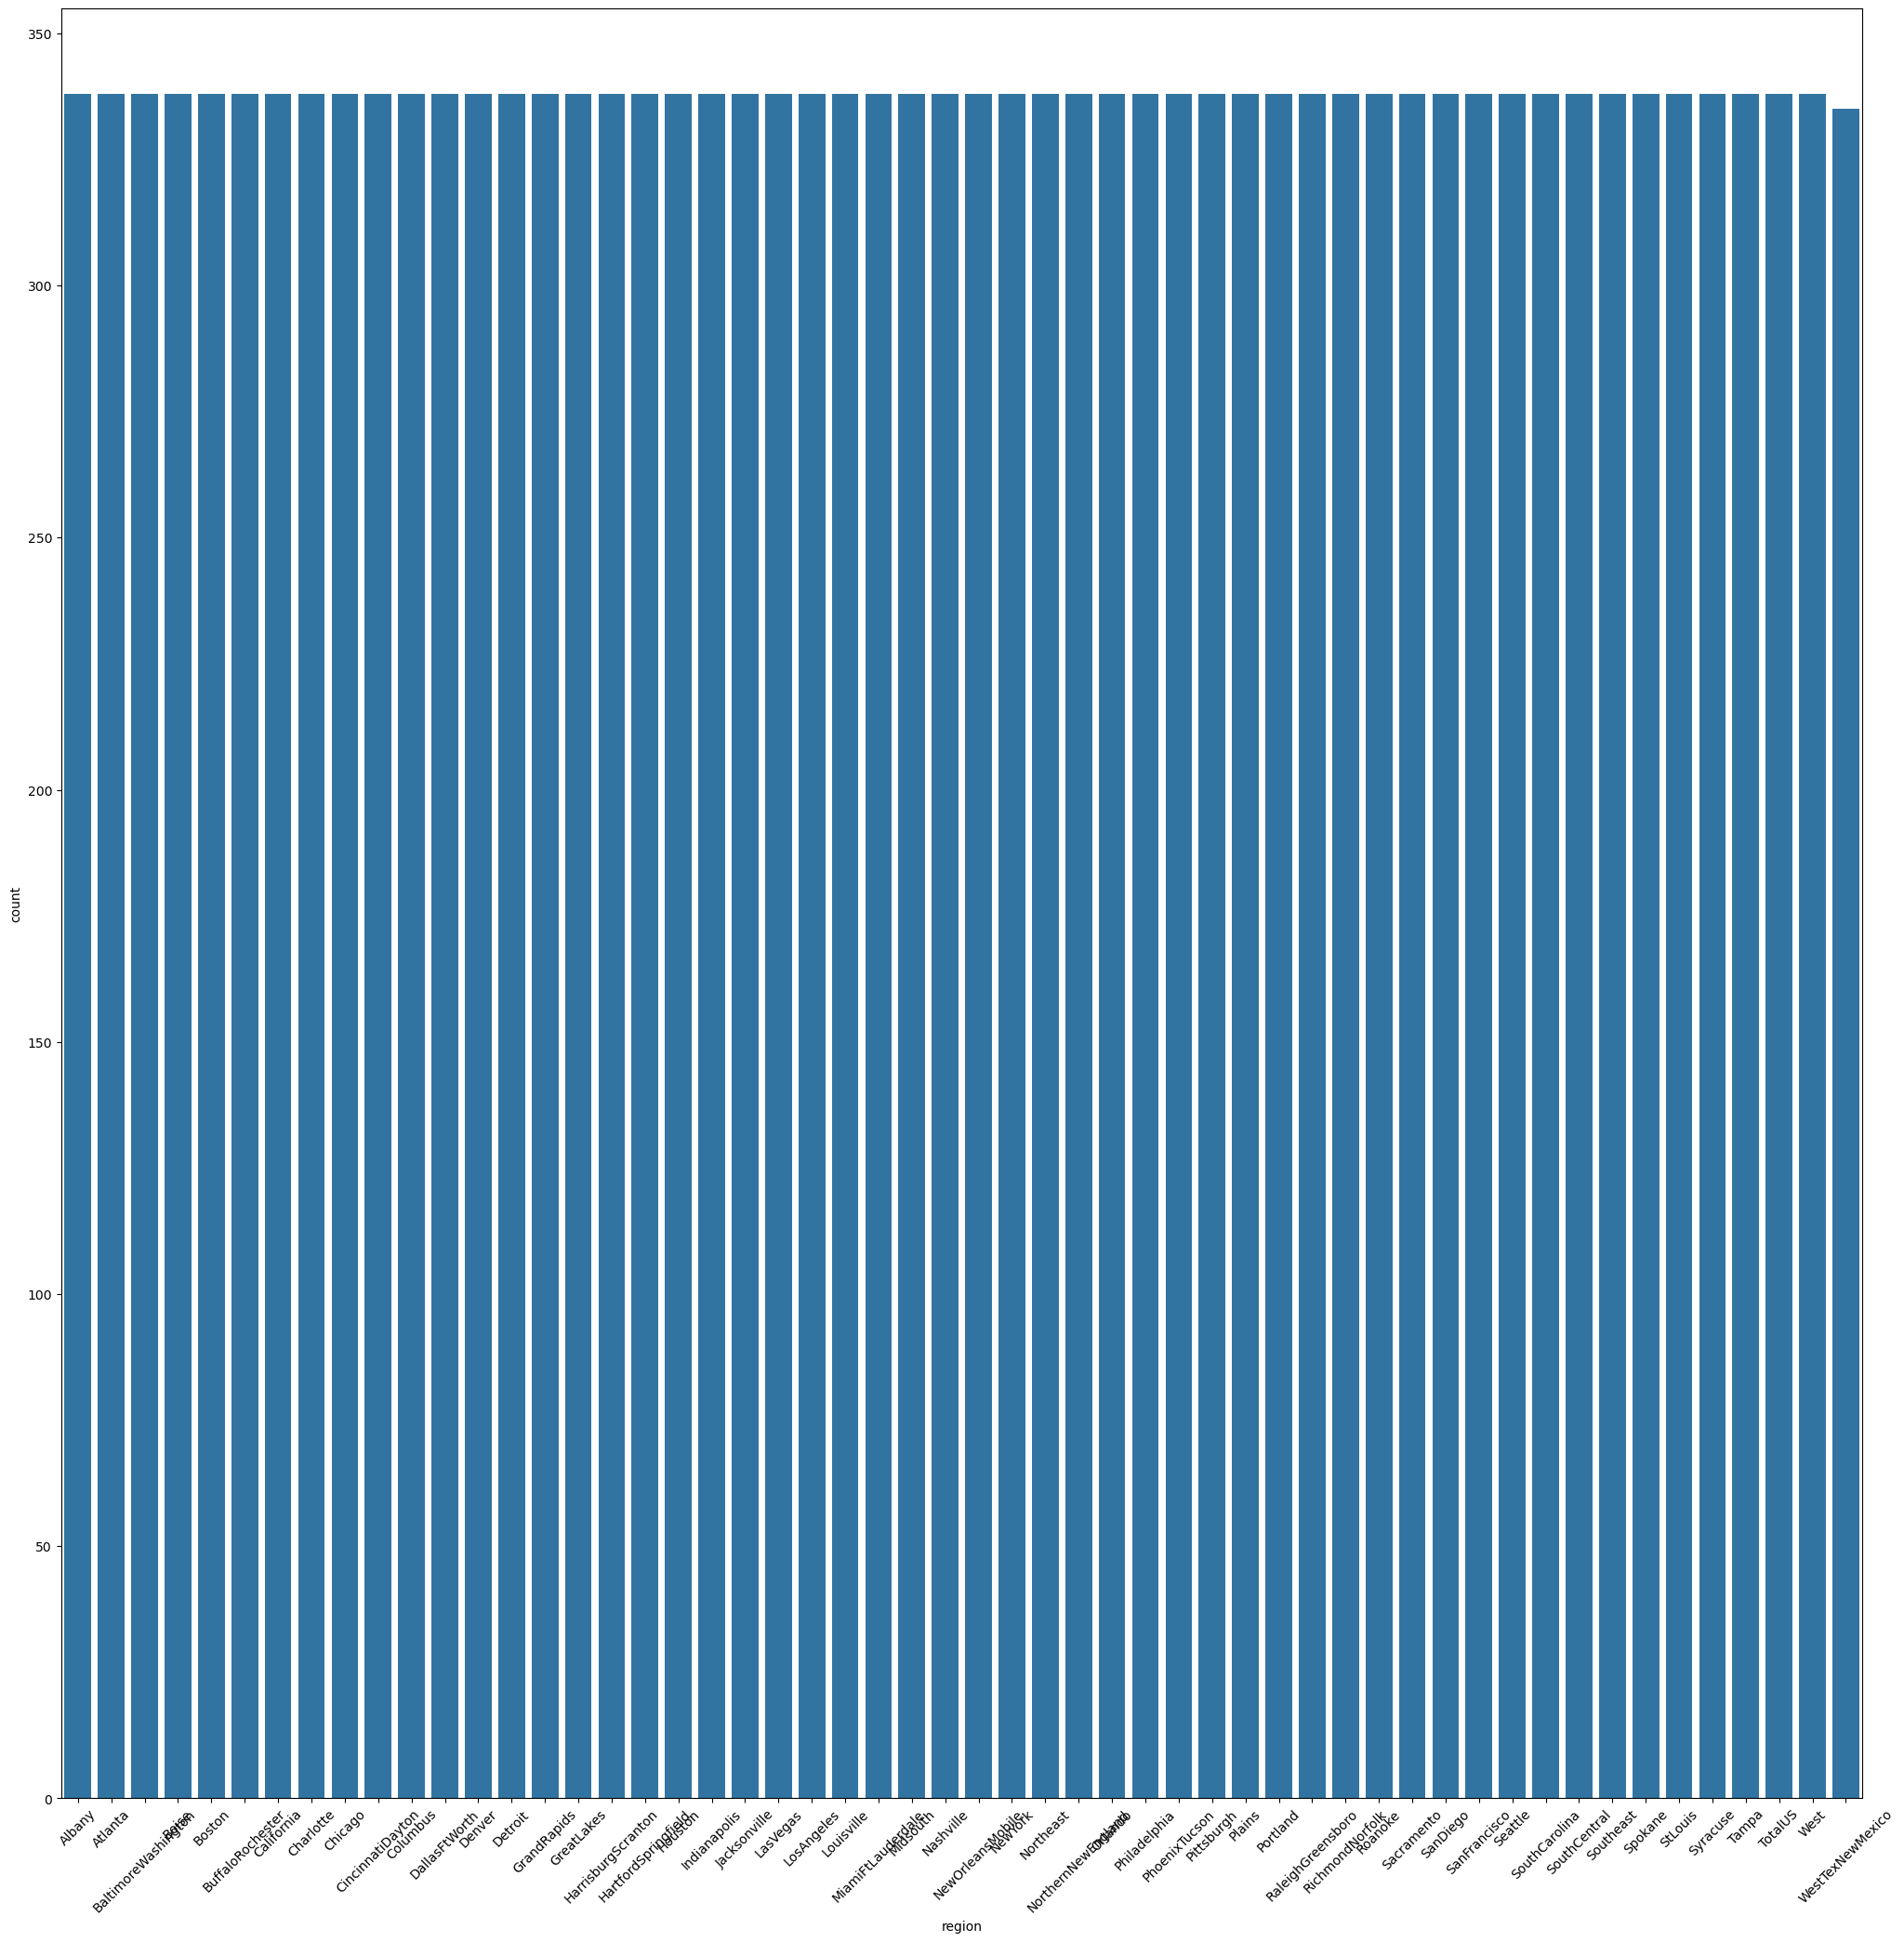

In [27]:
plt.figure(figsize=(25,25))
sns.barplot(x=region_count['region'],y=region_count['count'])
plt.xticks(rotation=45)

In [29]:
#Doing the same year wise
year_counts=avocado_df.groupby('year').size().reset_index(name='counts')


<Axes: xlabel='year', ylabel='counts'>

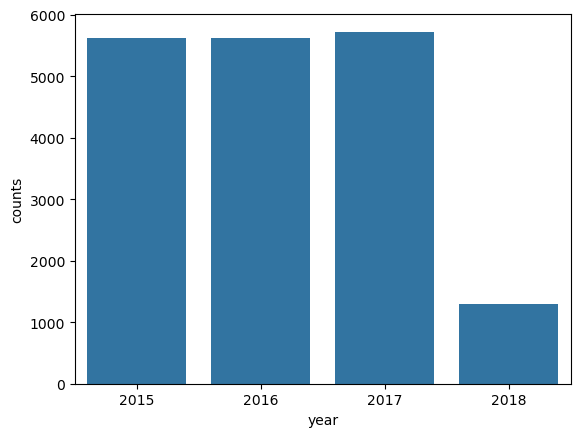

In [31]:
sns.barplot(x=year_counts['year'],y=year_counts['counts'])

In [42]:
avocado_df_prophet=avocado_df[['Date','AveragePrice']]

In [43]:
avocado_df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [45]:
avocado_df_prophet=avocado_df_prophet.rename(columns={'Date':'ds','AveragePrice':'y'})

In [46]:
m=Prophet()

In [50]:
m.fit(avocado_df_prophet)

Exception: Prophet object can only be fit once. Instantiate a new object.

In [51]:
forecast=m.make_future_dataframe(periods=365)

In [52]:
fore=m.predict(forecast)

In [53]:
fore

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498734,0.871183,1.850537,1.498734,1.498734,-0.114283,-0.114283,-0.114283,-0.114283,-0.114283,-0.114283,0.0,0.0,0.0,1.384452
1,2015-01-11,1.493549,0.876361,1.875221,1.493549,1.493549,-0.105771,-0.105771,-0.105771,-0.105771,-0.105771,-0.105771,0.0,0.0,0.0,1.387779
2,2015-01-18,1.488364,0.895231,1.863193,1.488364,1.488364,-0.105346,-0.105346,-0.105346,-0.105346,-0.105346,-0.105346,0.0,0.0,0.0,1.383018
3,2015-01-25,1.483179,0.848415,1.836090,1.483179,1.483179,-0.124168,-0.124168,-0.124168,-0.124168,-0.124168,-0.124168,0.0,0.0,0.0,1.359012
4,2015-02-01,1.477994,0.862223,1.816799,1.477994,1.477994,-0.152356,-0.152356,-0.152356,-0.152356,-0.152356,-0.152356,0.0,0.0,0.0,1.325639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.160836,0.539421,1.583760,0.980793,1.332301,-0.085609,-0.085609,-0.085609,-0.085609,-0.085609,-0.085609,0.0,0.0,0.0,1.075227
530,2019-03-22,1.160101,0.544732,1.625011,0.979178,1.331567,-0.083900,-0.083900,-0.083900,-0.083900,-0.083900,-0.083900,0.0,0.0,0.0,1.076200
531,2019-03-23,1.159365,0.567591,1.598372,0.977563,1.330637,-0.081916,-0.081916,-0.081916,-0.081916,-0.081916,-0.081916,0.0,0.0,0.0,1.077449
532,2019-03-24,1.158630,0.564693,1.608760,0.975948,1.329707,-0.079677,-0.079677,-0.079677,-0.079677,-0.079677,-0.079677,0.0,0.0,0.0,1.078953


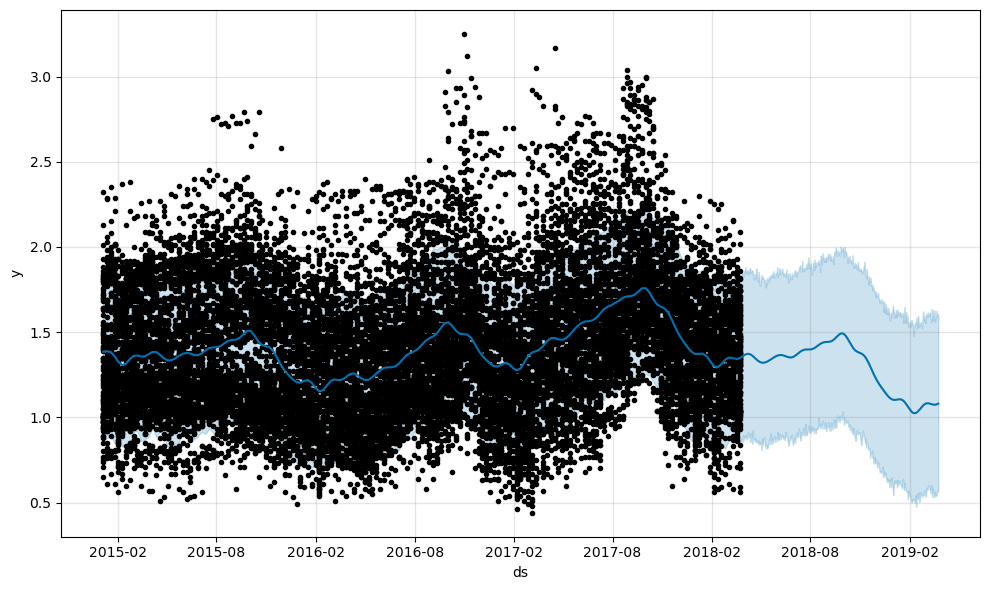

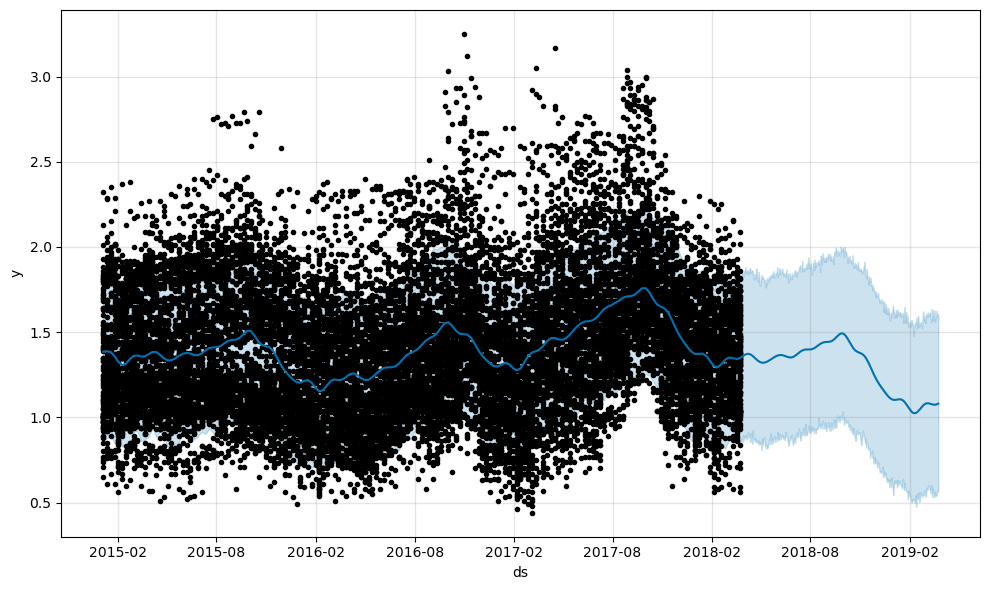

In [54]:
m.plot(fore)

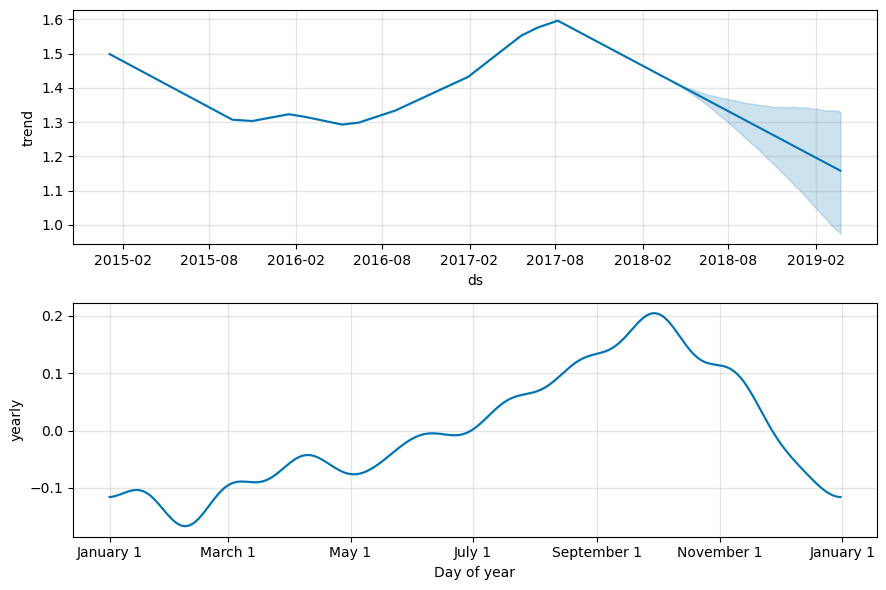

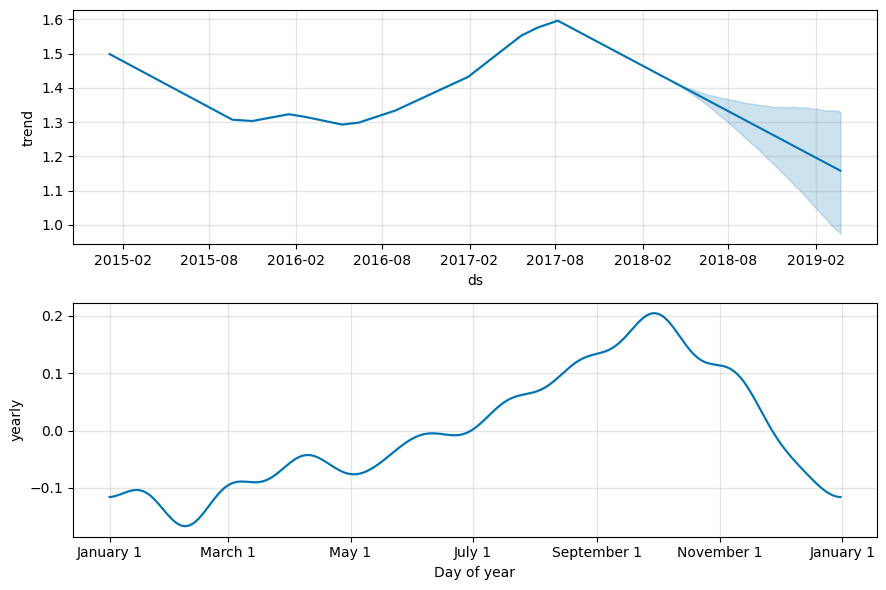

In [55]:
m.plot_components(fore)

In [56]:
#sometime around the fall time the avocado price is at its peak, could be because of the demand

In [57]:
#It is also seen that the avocado price was at its peak in the year 2017, and for the year 2019, the cost is actually a lot lesser

In [68]:
avocado_sample_df=avocado_df[avocado_df['region']=='West']

In [70]:
avocado_sample_df.sort_values('Date')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18227,2,2018-03-11,1.63,264691.87,27566.25,60383.57,276.42,176465.63,107174.93,69290.70,0.00,organic,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


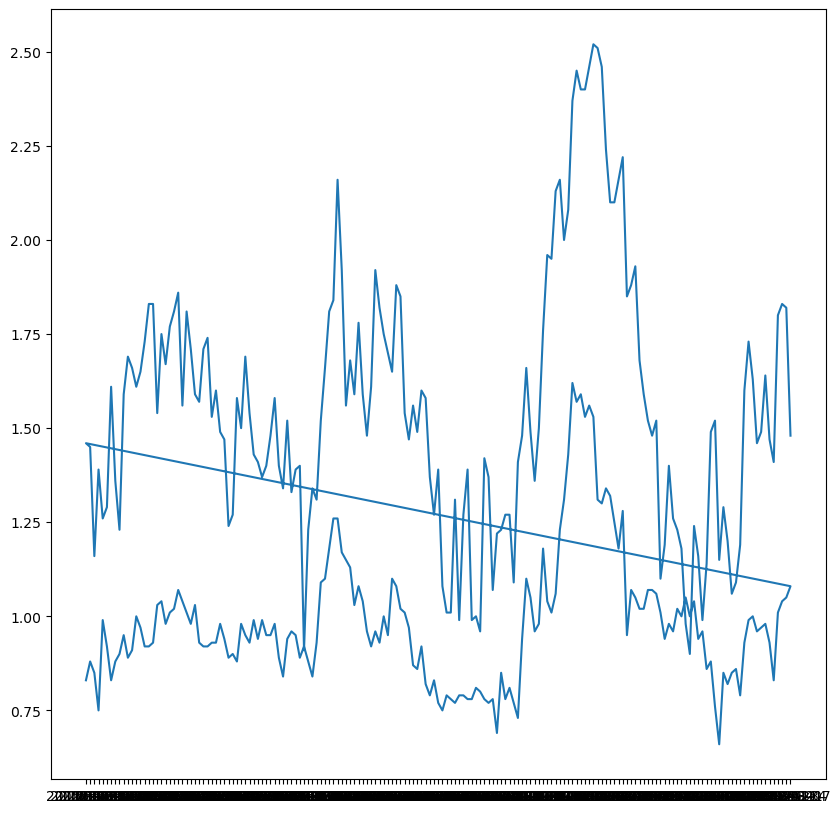

In [73]:
plt.figure(figsize=(10,10))
plt.plot(avocado_sample_df['Date'],avocado_sample_df['AveragePrice'])

In [75]:
avocado_sample=avocado_sample_df[['Date','AveragePrice']]

In [77]:
avocado_sample=avocado_sample.rename(columns={'Date':'ds','AveragePrice':'y'})

In [80]:
d=Prophet()

In [81]:
d.fit(avocado_sample)

16:57:45 - cmdstanpy - INFO - Chain [1] start processing
16:57:45 - cmdstanpy - INFO - Chain [1] done processing


In [82]:
future=d.make_future_dataframe(periods=365)

In [83]:
forecast=d.predict(future)

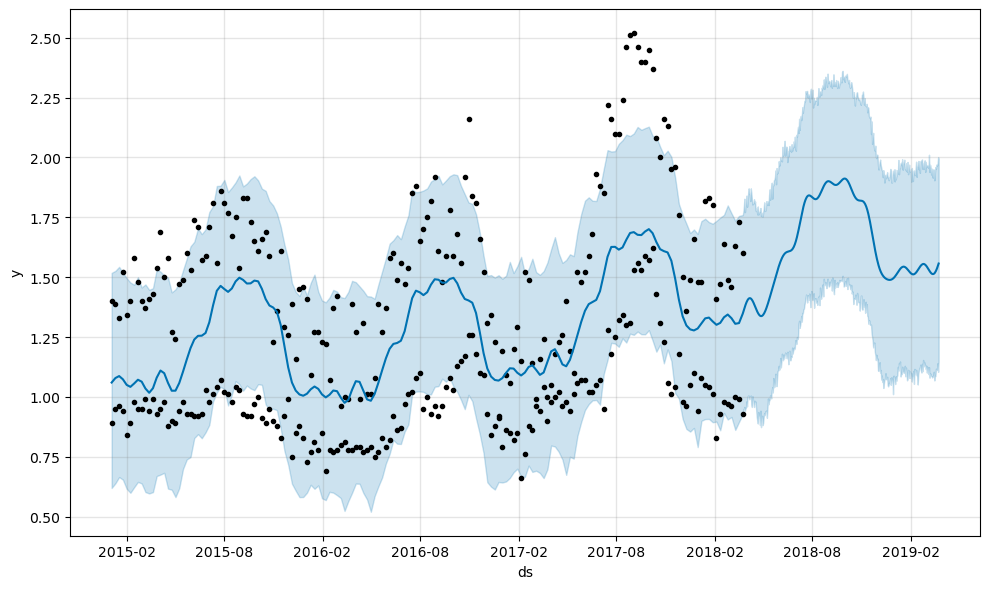

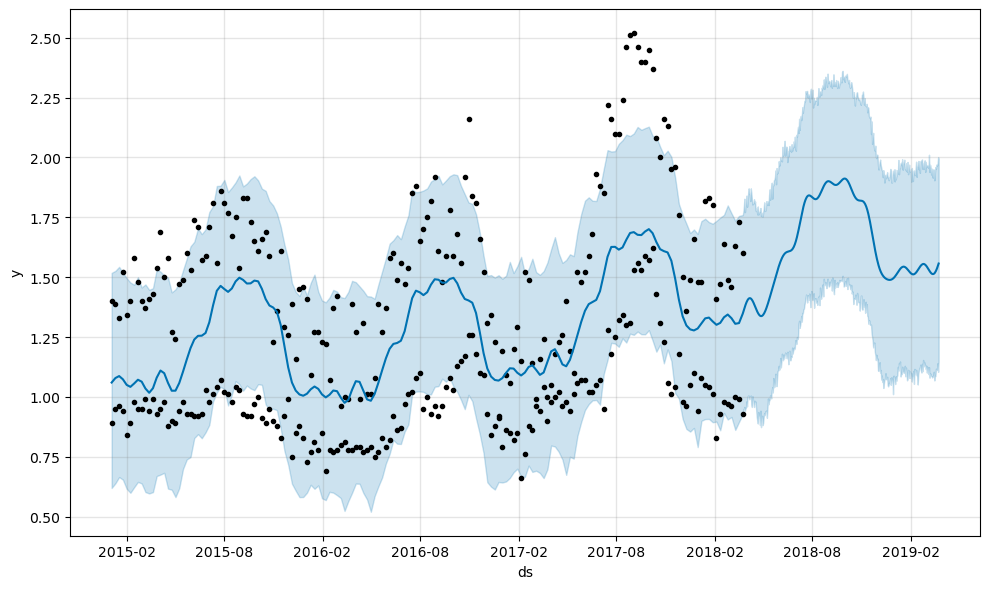

In [84]:
d.plot(forecast)

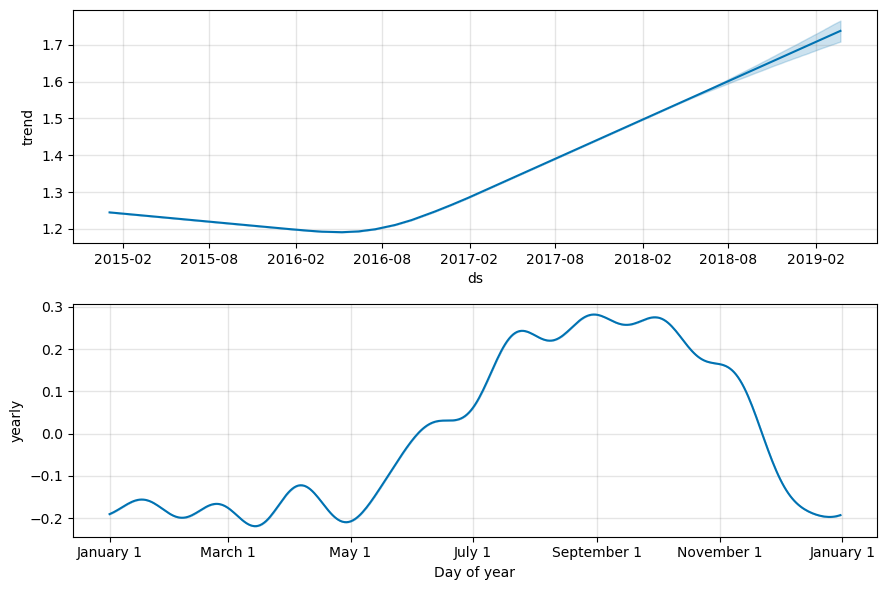

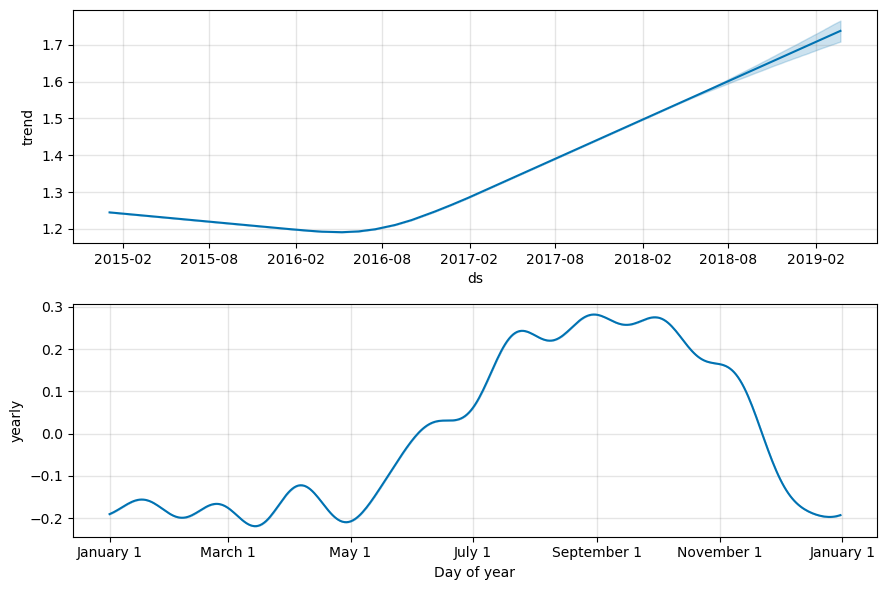

In [85]:
d.plot_components(forecast)

In [86]:
#In this region, the cost is bound to reach, 1.8 dollars in this region
#It is also noticed that the price is almost at its all time peak around the month of september